Linear Regression Health Costs Calculator
======
In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import seaborn as sns

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
df = pd.read_csv('insurance.csv')
df.tail()

--2023-08-29 09:46:30--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2023-08-29 09:46:30 (97.8 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


## **Data Preprocessing**
---
To prepare the data for model training, we need to preprocess it. Categorical variables like 'sex', 'smoker', and 'region' need to be converted into numerical format using one-hot encoding. This is essential for machine learning models to effectively process categorical data.



In [ ]:
# Convert categorical data to numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

## **Splitting Data into Train and Test Sets**
---
We split the dataset into a training dataset (80% of the data) and a test dataset (20% of the data). We also separate the target variable ('expenses') from both datasets to create labels for training and testing.

In [ ]:
# Split data into train and test datasets
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)


In [ ]:
# Separate target variable (expenses) from datasets
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

## **Defining the Neural Network Model**

We define a neural network model using Keras. The model architecture includes multiple hidden layers with dropout layers to prevent overfitting. The output layer contains a single neuron suitable for regression tasks.

In [ ]:
# Create a sequential neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

## **Compiling and Training the Model**
---
We compile the model using the mean squared error (MSE) loss function and the Adam optimizer. The model is then trained on the training data with early stopping to prevent overfitting.

In [ ]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [ ]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_dataset, train_labels, epochs=300, validation_split=0.2, verbose=0, callbacks=[early_stopping])

## **Evaluating the Model**
---
We evaluate the model's performance using the test dataset. We calculate the mean absolute error (MAE) and mean squared error (MSE) to assess how accurately the model predicts healthcare costs.

In [ ]:
# Evaluate the model on the test dataset
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

9/9 - 0s - loss: 33820360.0000 - mae: 3146.6316 - mse: 33820360.0000 - 33ms/epoch - 4ms/step
Testing set Mean Abs Error: 3146.63 expenses


## **Final Evaluation**
---
The goal is to achieve a Mean Absolute Error (MAE) of under 3500, indicating that the model predicts healthcare costs accurately within $3500. The following code tests whether the MAE meets this criteria and provides feedback.

9/9 - 0s - loss: 33820360.0000 - mae: 3146.6316 - mse: 33820360.0000 - 33ms/epoch - 4ms/step
Testing set Mean Abs Error: 3146.63 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


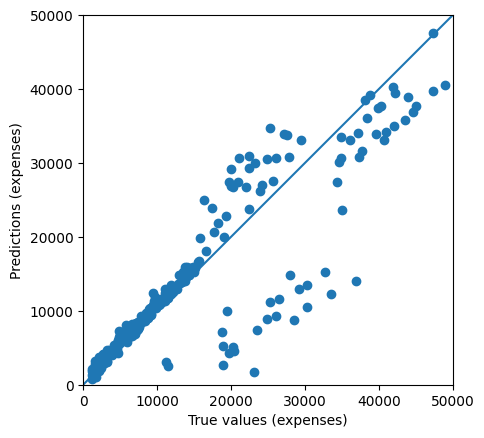

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
